# Árboles de clasificación
### Rodrigo Manzanas, Ana Casanueva, Joaquin Bedia 
#### 18 Noviembre 2024

En la práctica de hoy vamos a profundizar un poco más sobre algunos de los conceptos que se han visto en la sesión de teoría. En particular, veremos cómo se trabaja para encontrar la configuración óptima de un árbol de clasificación, para lo cual necesitamos tener presentes las nociones ya vistas sobre overfitting (sobreajuste) y cross-validación. Utilizaremos los paquetes *tree*, *rpart* y *caret*.

In [13]:
# loading libraries
library(tree)
library(rpart)
library(caret)

En primer lugar, carga en tu sesión de `R` el dataset con el que vamos a trabajar, *Carseats* (incluido en el paquete *ISLR*). Antes de arrancar, dedica unos minutos para familiarizarte con él.

In [14]:
library(ISLR)
str(Carseats)
head(Carseats, 10)
summary(Carseats)
?Carseats

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,6.63,115,105,0,45,108,Medium,71,15,Yes,No
8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
9,6.54,132,110,0,108,124,Medium,76,10,No,No


     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

Carseats {ISLR},R Documentation


Convertiremos la variable continua *Sales* (cantidad de carritos vendidos, en miles de unidades) a categórica (de tipo factor), que podrá tomar los valores *No* (valores menores o iguales a 8) y *Yes* (valores mayores que 8). Este nuevo factor será nuestra variable objetivo a clasificar durante la práctica. Por conveniencia, la vamos a renombar como *high*.

In [15]:
# convert continuous variable "Sales" to categorical
dataset = Carseats  # renombro el dataset por comodidad
high = ifelse(dataset$Sales <= 8, "No", "Yes")
dataset$Sales = as.factor(high)
names(dataset)[1] = "high"

A continuación, vamos a definir una nueva función (nómbrala *acc.class*) que calcule la métrica de validación que utilizaremos a lo largo de toda la práctica; el ratio de aciertos o *accuracy* (usa la función `table`).

In [16]:
## evaluation function
acc.class = function(x, y) {
  stopifnot(length(x) == length(y))
  return(sum(diag(table(x, y))) / length(x))
}

Ahora dividimos el dataset total en dos mitades independientes de train y test, escogidas aleatoriamente.

In [17]:
## independent train and test 
n = nrow(dataset)
set.seed(1)
indtrain = sample(1:n, 0.5*n)  # mitad de observaciones para train
indtest = setdiff(1:n, indtrain)  # mitad de observaciones para test
dataset.train = dataset[indtrain, ]
dataset.test = dataset[indtest, ]

***
## El proceso de poda (_prunning_)

El primer objetivo de la práctica es obtener, manualmente, la configuración óptima del árbol (aquella que minimiza el error de test, para no caer en sobreajuste). Para ello debemos ver cómo evoluciona el error de clasificación en el train y en el test, en función de la complejidad del árbol. 

### Ejercicio

Entrena un árbol "completo" (función *tree*) utilizando el dataset de train. A continuación, ve podando ese árbol (escoge valores para el número de hojas entre 3 y 15) y calcula su accuracy para clasificar, tanto sobre el dataset de train como sobre el de test. Dibuja ambos errores en función del número de hojas del árbol e interpreta los resultados. ¿Cuál sería la configuración óptima del árbol?  
**Nota**: Utiliza la función *prune.tree* (argumento *best*).

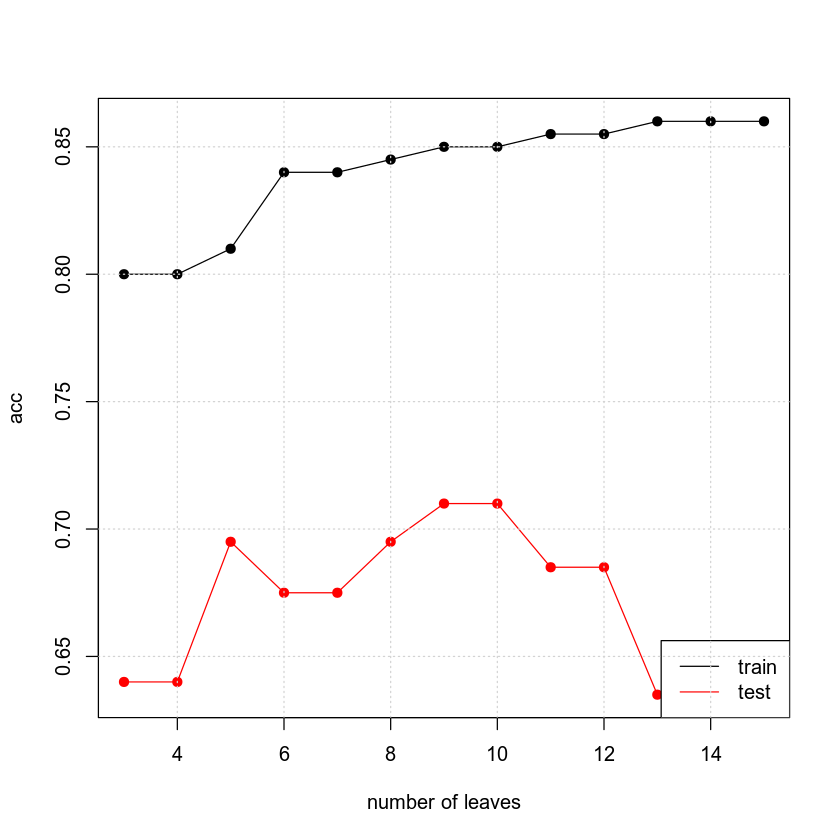

In [18]:
## pruning the tree to find the optimal configuration 
# learning the tree
t = tree(high ~ ., dataset.train)

acc.train = c()
acc.test = c()
nleaf = 3:15
for (n in nleaf) {
  # pruning the complete tree (based on parameter "best")
  t.pruned = prune.tree(t, best = n)
  
  # performance on training data
  pred.train = predict(t.pruned, dataset.train, type = "class")
  acc.train[nleaf == n] = acc.class(pred.train, dataset.train$high)
  
  # performance on test data
  pred.test = predict(t.pruned, dataset.test, type = "class")
  acc.test[nleaf == n]= acc.class(pred.test, dataset.test$high)
}
matplot(nleaf, cbind(acc.train, acc.test), 
        type = "o", pch = 19, lty = 1, col = c("black", "red"),
        xlab = "number of leaves", ylab = "acc")
legend("bottomright", c("train", "test"), lty = 1, col = c("black", "red"))
grid()

Utiliza la función *cv.tree* para hacer una cross-validación hold-out sobre el dataset de train. ¿A qué conclusión llegas?
***
**Idea:** Busca en el objeto de salida que te devuelve *cv.tree* y dibuja el factor de desviación (medida que da idea del error de clasificación) en función del tamaño del árbol.
***

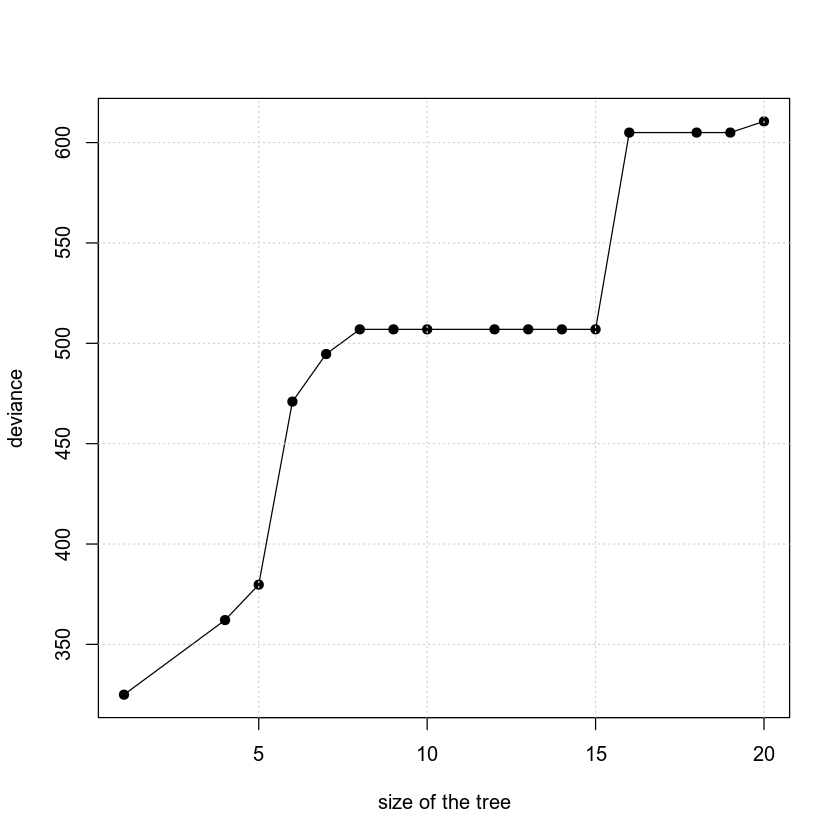

In [19]:
# hold-out cross-validation
t.cv = cv.tree(t, K = 2)  
# deviance ~ entropy ~ error
plot(t.cv$size, t.cv$dev, type = "o", pch = 19, 
     xlab = "size of the tree", ylab = "deviance")
grid()

Una vez hemos encontrado la configuración óptima (número de hojas) de nuestro árbol, evalúa el accuracy del árbol completo y el del óptimo, tanto en train como en test. ¿Qué conclusión obtienes?

In [20]:
## performance in train
# complete tree
t = tree(high ~ ., dataset.train)
pred.train = predict(t, dataset.train, type = "class")
# optimum tree
t.opt = prune.tree(t, best = 9)
pred.train.opt = predict(t.opt, dataset.train, type = "class")

acc.class(pred.train, dataset.train$high)
acc.class(pred.train.opt, dataset.train$high)

[1] 0.895

[1] 0.85

In [21]:
# performance in test
pred.test = predict(t, dataset.test, type = "class")
pred.test.opt = predict(t.opt, dataset.test, type = "class")
acc.class(pred.test, dataset.test$high)
acc.class(pred.test.opt, dataset.test$high)

[1] 0.64

[1] 0.71

¿Cuántas hojas tiene el árbol total? Dibuja ambos árboles para ver la diferencia en complejidad. 


Classification tree:
tree(formula = high ~ ., data = dataset.train)
Variables actually used in tree construction:
[1] "Price"       "Population"  "US"          "CompPrice"   "Advertising"
[6] "Income"      "ShelveLoc"   "Age"        
Number of terminal nodes:  20 
Residual mean deviance:  0.4549 = 81.89 / 180 
Misclassification error rate: 0.105 = 21 / 200 


Classification tree:
snip.tree(tree = t, nodes = c(31L, 57L, 30L, 29L, 2L))
Variables actually used in tree construction:
[1] "Price"       "CompPrice"   "Advertising" "Income"      "ShelveLoc"  
Number of terminal nodes:  9 
Residual mean deviance:  0.7272 = 138.9 / 191 
Misclassification error rate: 0.15 = 30 / 200 

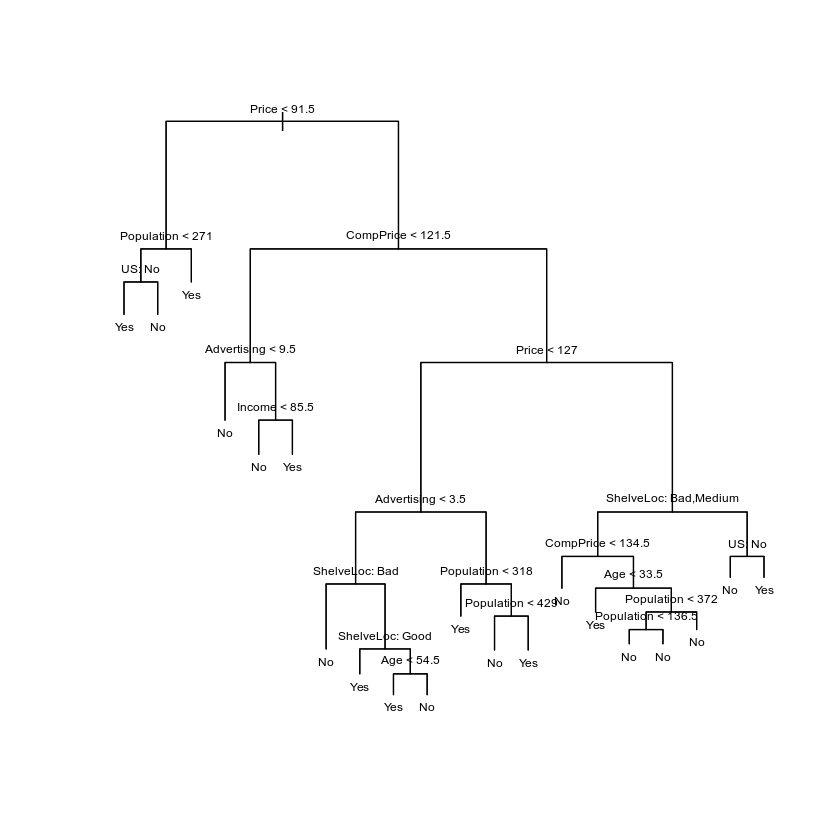

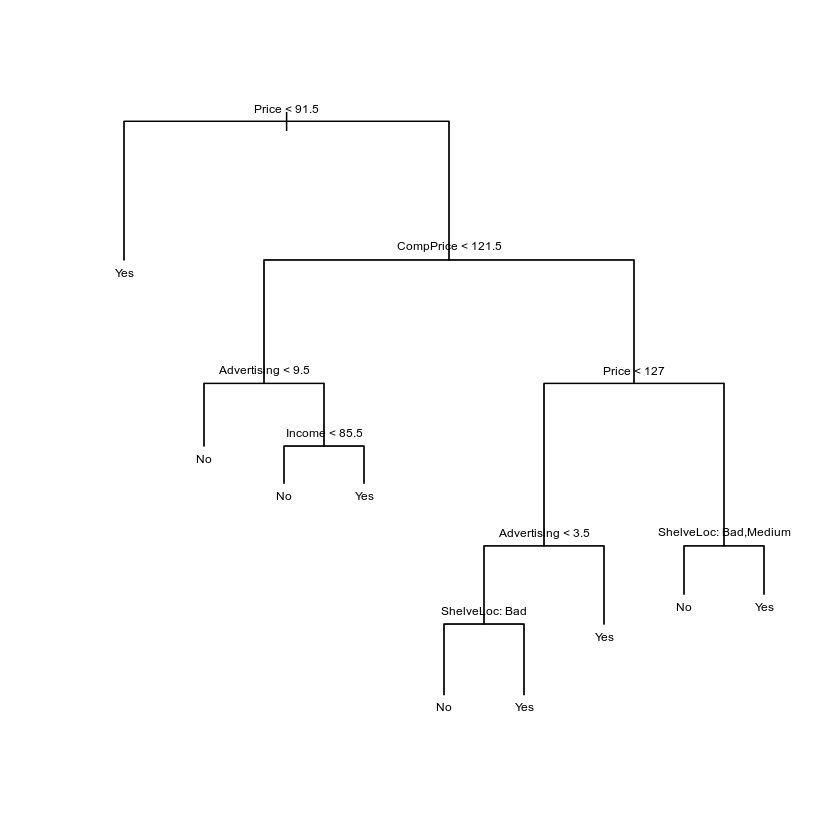

In [22]:
summary(t)
summary(t.opt)
plot(t); text(t, pretty = F, cex = 0.6)
plot(t.opt); text(t.opt, pretty = F, cex = 0.6)

***

Hasta ahora, hemos obtenido la configuración óptima del árbol en función del número de hojas del mismo. La idea ahora es fijarnos en otro parámetro, la profundidad del árbol (ambos conceptos están relacionados). Para ello, aprende un conjunto de árboles de diferente profundidad (de 1 a 10 niveles) utilizando el dataset de train y evalúa su accuracy para clasificar en el test. Dibuja dicho accuracy en función de la profundidad del árbol. ¿Cuál sería la configuración óptima en este caso? Compara el accuracy obtenido para esta configuración con el que obteníamos en el ejercicio anterior.  
**Nota:** Usa la función *rpart* (parámetro *maxdepth*).

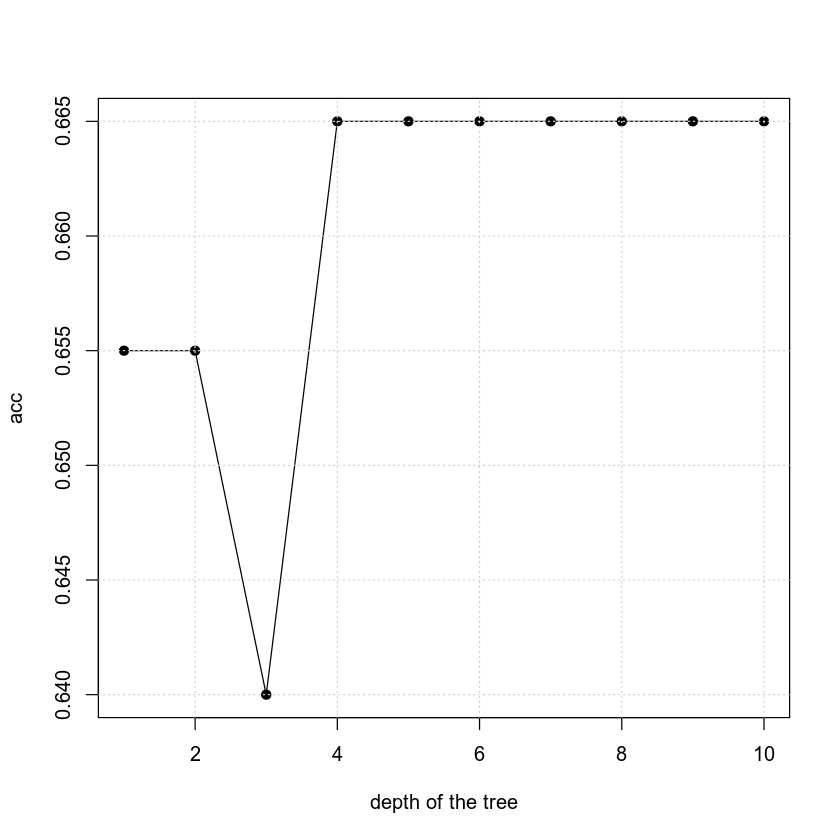

In [23]:
md = 1:10
acc.test = c()
for (i in md) {
  t.train = rpart(high ~ ., dataset.train, maxdepth = i)
  pred.test = predict(t.train, dataset.test, type = "class")
  acc.test[i] = acc.class(pred.test, dataset.test$high)
}
plot(md, acc.test, type = "o", pch = 19, xlab = "depth of the tree", ylab = "acc")
grid()

***

## El paquete `caret`


El paquete *caret* pemite evaluar de forma sencilla la idoneidad de varios parámetros de configuración del árbol considerando distintos tipos de cross-validación.  

### Ejercicio

Utilizando la función *train* de *caret* (method *rpart2*), calcula el accuracy que se obtiene para 5 árboles de distinta profundidad (valores escogidos internamente por *caret*) bajo un esquema de cross-validación con 5 folds. Dibuja los resultados.  
**Preguntas:** ¿Cuál dirías que es la configuración óptima del árbol en este caso? ¿Los resultados son diferentes a lo que esperabas obtener? ¿A qué puede deberse?  
**Nota:** La siguiente página ofrece una documentación muy buena de *caret*: https://topepo.github.io/caret

note: only 4 possible values of the max tree depth from the initial fit.
 Truncating the grid to 4 .



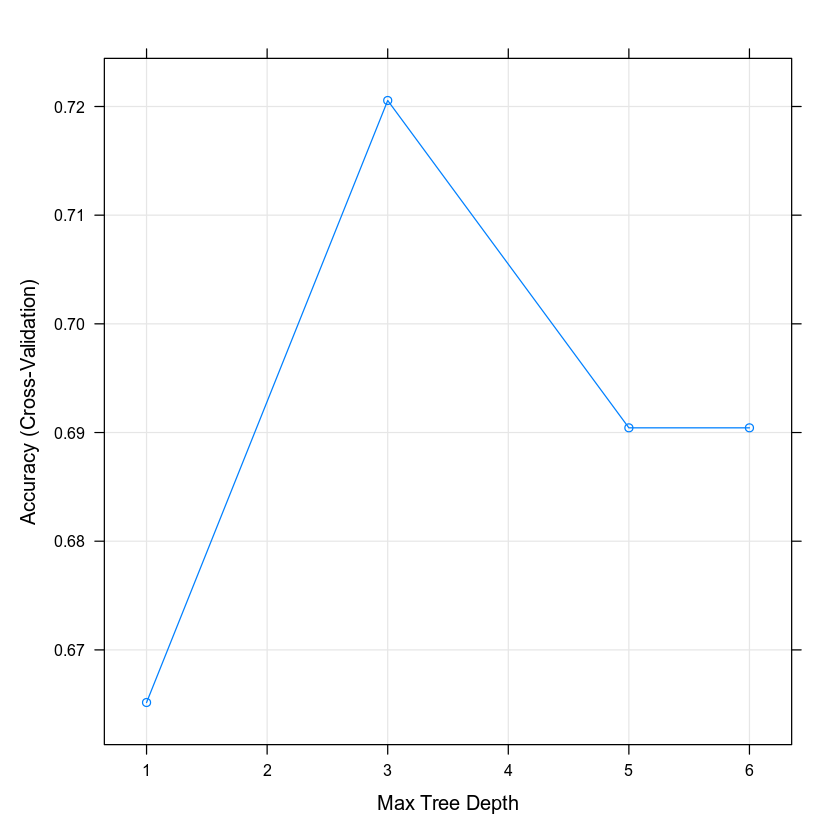

In [24]:
trctrl = trainControl(method = "cv", number = 5)  # cross-validation with 5 folds
## caret automatically tries different values of the method's parameter: internal selection
t = train(high ~ ., data = dataset.train,
          method = "rpart2",
          trControl = trctrl,
          tuneLength = 5)
plot(t)  

En lugar de dejar que *caret* seleccione internamente los valores del parámetro (en este caso *maxdepth*) a probar, podemos especificárselos nosotr@s. Para ello hay que definir el *grid* que va a considerar *caret* (argumento *tuneGrid*).

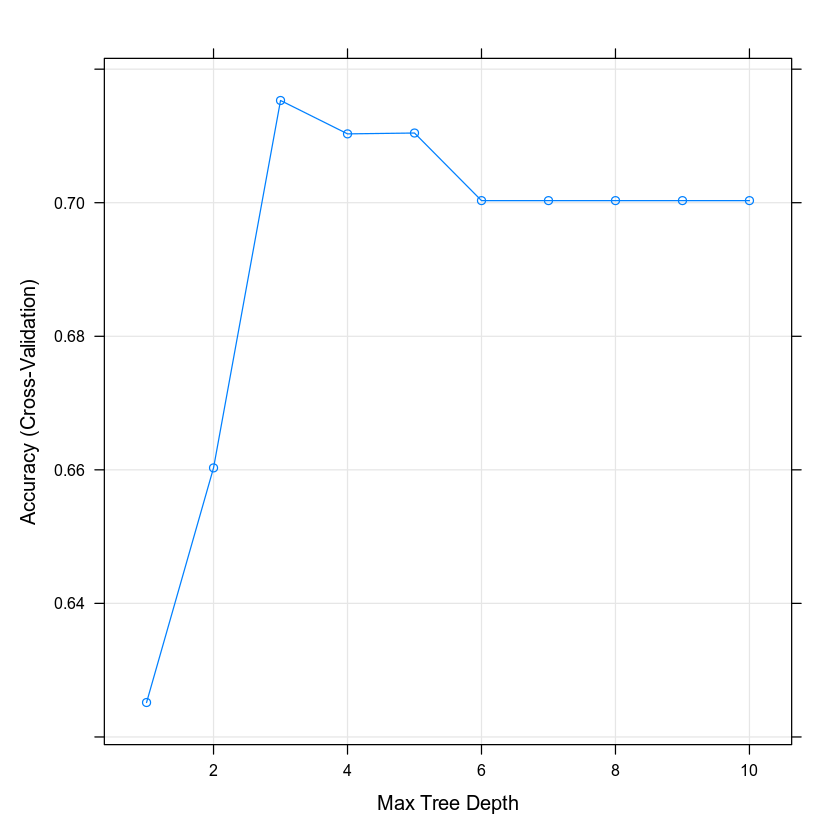

In [25]:
trctrl = trainControl(method = "cv", number = 5)
md = 1:10  # maximum depth allowed for the tree
t = train(high ~ ., data = dataset.train,
            method = "rpart2",
            trControl = trctrl,
            tuneGrid = expand.grid(maxdepth = md))  # user-defined values tested for the method's parameter 
plot(t)  

**Preguntas:** Los resultados han cambiado, ¿por qué? ¿Qué pasa si ejecutas varias veces el bloque de código anterior?

### Ejercicio

Para comprobar el efecto que tiene en nuestros resultados la elección de los subconjuntos de train y test, repite el ejercicio anterior 20 veces, salvando en cada iteración la profundidad del árbol óptimo (prueba valores entre 1 y 10).  
**Idea:** Puedes usar un bucle *while*.  
**Pregunta:** A la vista de los resultados, ¿dirías que es importante tener en cuenta el efecto de la partición train/validation durante el proceso de optimización del árbol?

[1] "... realization 1 ..."
[1] "... realization 2 ..."
[1] "... realization 3 ..."
[1] "... realization 4 ..."
[1] "... realization 5 ..."
[1] "... realization 6 ..."
[1] "... realization 7 ..."
[1] "... realization 8 ..."
[1] "... realization 9 ..."
[1] "... realization 10 ..."
[1] "... realization 11 ..."
[1] "... realization 12 ..."
[1] "... realization 13 ..."
[1] "... realization 14 ..."
[1] "... realization 15 ..."
[1] "... realization 16 ..."
[1] "... realization 17 ..."
[1] "... realization 18 ..."
[1] "... realization 19 ..."
[1] "... realization 20 ..."


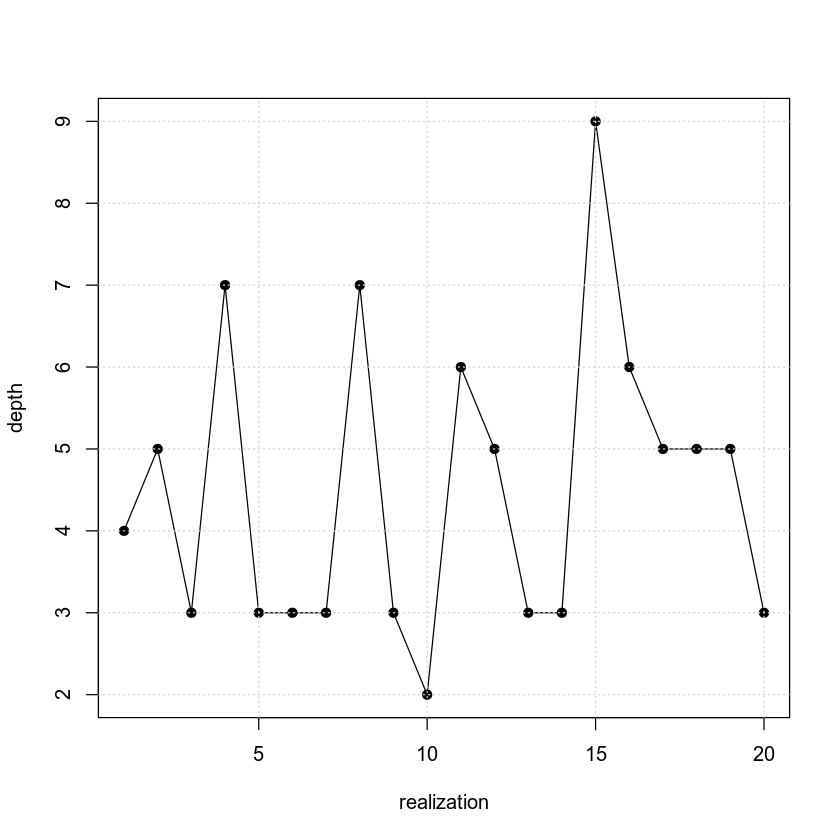

In [26]:
## effect of train/test partition on optimum depth
trctrl = trainControl(method = "cv", number = 5)
md = 1:10
depth = c()

i = 1
while (i <= 20) {
print(sprintf("... realization %d ...", i))
t = train(high ~ ., data = dataset.train,
          method = "rpart2",
          trControl = trctrl,
          tuneGrid = expand.grid(maxdepth = md))
depth[i] = t$bestTune$maxdepth
i = i+1
}

plot(1:20, depth, type = "o", pch = 19, xlab = "realization") 
grid()

### Ejercicio
Una vez hemos definido una profundidad óptima para nuestro árbol, comprueba ahora cuál sería el efecto de la partición train/validation sobre el accuracy.  

**Idea:** Reutiliza el código anterior. Entre muchas otras cosas, la función *train* devuelve lo que estás buscando. Da una estimación (valor promedio +/- margen de incertidumbre) del accuracy.

[1] "... realization 1 ..."
[1] "... realization 2 ..."
[1] "... realization 3 ..."
[1] "... realization 4 ..."
[1] "... realization 5 ..."
[1] "... realization 6 ..."
[1] "... realization 7 ..."
[1] "... realization 8 ..."
[1] "... realization 9 ..."
[1] "... realization 10 ..."
[1] "... realization 11 ..."
[1] "... realization 12 ..."
[1] "... realization 13 ..."
[1] "... realization 14 ..."
[1] "... realization 15 ..."
[1] "... realization 16 ..."
[1] "... realization 17 ..."
[1] "... realization 18 ..."
[1] "... realization 19 ..."
[1] "... realization 20 ..."


[1] 0.70748421 0.03070743

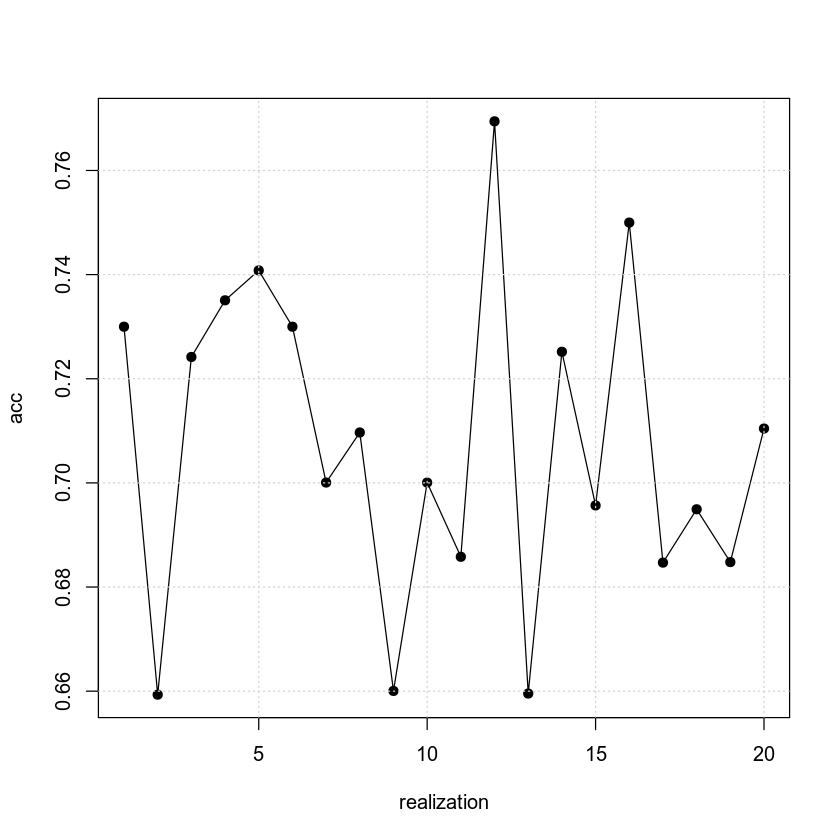

In [27]:
## effect on accuracy of train/test partition
trctrl = trainControl(method = "cv", number = 5)
acc = c()

i = 1
while (i <= 20) {
  print(sprintf("... realization %d ...", i))    
  t = train(high ~ ., data = dataset.train,
            method = "rpart2",
            trControl = trctrl,
            tuneGrid = expand.grid(maxdepth = 5))
  acc[i] = t$results$Accuracy
  i = i+1
}

plot(1:20, acc, type = "o", pch = 19, xlab = "realization")  
grid()

c(mean(acc), sd(acc))

El ejercicio anterior puede hacerse de forma mucho más sencilla simplemente con cambiar el modo en el que definimos la cross-validación.

### Ejercicio
Revisa la documentación de la función *trainControl* y replica el ejercicio anterior.

In [28]:
## previous block with caret
trctrl = trainControl(method = "repeatedcv", number = 5, repeats = 20)
t = train(high ~ ., data = dataset.train,
          method = "rpart2",
          trControl = trctrl,
          tuneGrid = expand.grid(maxdepth = 5))
c(t$results$Accuracy, t$results$AccuracySD)

[1] 0.71606395 0.07093481

Lógicamente, el número de folds considerados también puede tener un efecto en la búsqueda de la configuración óptima del árbol. 

### Ejercicio
Comprueba cómo varía la profundidad óptima del árbol (posibles valores entre 1 y 10) al cambiar el número de folds (desde 3 hasta 10).

[1] "... trying with 3 folds ..."
[1] "... trying with 4 folds ..."
[1] "... trying with 5 folds ..."
[1] "... trying with 6 folds ..."
[1] "... trying with 7 folds ..."
[1] "... trying with 8 folds ..."
[1] "... trying with 9 folds ..."
[1] "... trying with 10 folds ..."


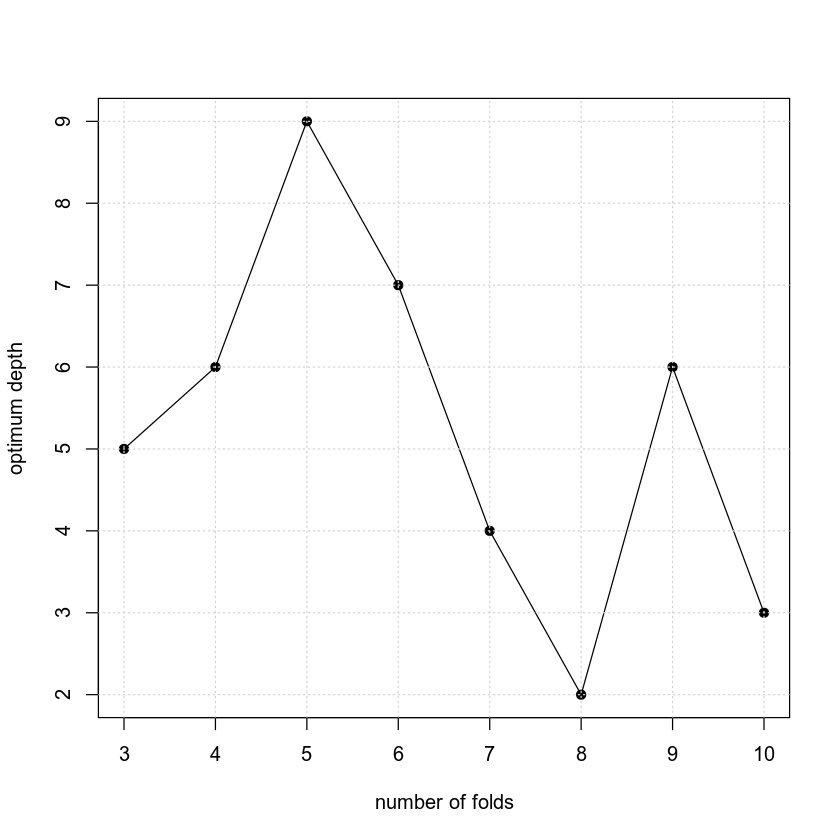

In [29]:
## effect of number of folds
k = 3:10

depth = c()
for (nf in k) {
  print(sprintf("... trying with %d folds ...", nf))
    
  trctrl = trainControl(method = "cv", number = nf)
  t = train(high ~ ., data = dataset.train,
            method = "rpart2",
            trControl = trctrl,
            tuneGrid = expand.grid(maxdepth = 1:10))
  depth[k == nf] = t$bestTune$maxdepth  
}
plot(k, depth, type = "o", pch = 19,
     xlab = "number of folds", ylab = "optimum depth") 
grid()